# AVIATION RISK ANALYSIS 

## INTRODUCTION

### Aviation Risks encompases any potential Hazards and uncertainities that could impact the safety , security and efficiency of the aircraft operations

### Some of the Key Risks include the following :
1. Operational Risks : Day to Day flight procedures such as ground handling and human performances
2. Technical Risks : Malfunctions , failures , aircraft systems and engine
3. Human Factors Risks : Errrors streaming from Human performances such as pilot errors , inadequate training and communication breakdowns
4. Environmental Risks : Are mostly the Adverse weather conditions such as hailstorms
5. Security Risks : Mostly threats from unlawful interference including terrorism and cyber-security breaches
6. 

#### Data source and presentations 
1. We used data from kaggle :https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses
2. Non-Technical presentations , refer to :
3. tableau presentations , refer to :

### Business Understanding
1. Aviation's core business relies on the safety of the passengers , crew and Assets
2. Aviation Accidents lead to catastrophic loss of life , severe financial impacts and irreversible reputational damage .

A company seeking to venture into aviation industry , speicificaly on purchasing and operating airplanes for commercial or private enterprise need to consider the following :

1. Which Aircraft Category is safer compared to others
2. What is the trend of aviation accidents with time
3. How does engine type affect fatalities and does number of engines affect
4. What phase of flight do most accidents occur
5. TE environmental risks / weather conditions 

### OBJECTIVES 
1. Data understanding
2. Exploratory Data Analysis
3. Data preparation And Data Cleaning
4. Data Visualizations
5. Business Recommendations 

### DATA UNDERSTANDING 

For the project Analysis , we sourced data from from kaggle : Aviation Risk Analysis , Insights from U.S accidents data up to 2022

Key columns include :

1. Event Date - The date when the accident occured
2. Location - the exact location of the accident
3. Injury Severity - How critical the injuries were
4. Aircraft Damage - The impact of the crash on the plane
5. Make - the make or aircraft type
6. Engine types in the planes
7. Number of the engines in the plane
8. Broad phase of flight - Stage of crash occurance
9. Weather conditions

Among others 

### 1. LOADING THE DATASET

#### Importing the neccessary and important python libraries to be used for analysis

In [78]:
# import pandas alias 
import pandas as pd
# import numpy alias np
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# import seaborn alias sns 
import seaborn as sns 


In [79]:
# Reading the datset csv file as df  
df = pd.read_csv("AviationData.csv",encoding='latin1',low_memory=False)
# print the first 10 columns of the dataset
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


##### UNDERSTANDING OUR DATA df

In [80]:
# checking for size and Dimensionality of the data
df.shape

(88889, 31)

In [81]:
# checking for duplicates 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [82]:
# duplicated sums 
df.duplicated().sum()

0

In [83]:
# CONCISE SUMMARY OF THE DATA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [84]:
# Calling column names
df.columns.tolist() # viewing them in a python list format

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [85]:
# SUMMARY STATISTICS 
# Aids in potential identication of outliers 
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [86]:
# looking for nan / null values in our data
df.isna()
# True represents 1 while False represents 0 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [87]:
# missing value percentage representation
missing_percentage = df.isnull().mean()*100
# round off to 2 decimal places 
missing_percentage.round(2)

Event.Id                   0.00
Investigation.Type         0.00
Accident.Number            0.00
Event.Date                 0.00
Location                   0.06
Country                    0.25
Latitude                  61.32
Longitude                 61.33
Airport.Code              43.60
Airport.Name              40.71
Injury.Severity            1.12
Aircraft.damage            3.59
Aircraft.Category         63.68
Registration.Number        1.55
Make                       0.07
Model                      0.10
Amateur.Built              0.11
Number.of.Engines          6.84
Engine.Type                7.98
FAR.Description           63.97
Schedule                  85.85
Purpose.of.flight          6.97
Air.carrier               81.27
Total.Fatal.Injuries      12.83
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Uninjured            6.65
Weather.Condition          5.05
Broad.phase.of.flight     30.56
Report.Status              7.18
Publication.Date          15.49
dtype: f

### 2. DATA PREPARATION AND CLEANING

In [88]:
# STANDARDIZING OUR COLUMNS 
# REPLACING . WITH _ 
df.columns = df.columns.str.replace('.', '_')

In [89]:
df.columns.tolist()

['Event_Id',
 'Investigation_Type',
 'Accident_Number',
 'Event_Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport_Code',
 'Airport_Name',
 'Injury_Severity',
 'Aircraft_damage',
 'Aircraft_Category',
 'Registration_Number',
 'Make',
 'Model',
 'Amateur_Built',
 'Number_of_Engines',
 'Engine_Type',
 'FAR_Description',
 'Schedule',
 'Purpose_of_flight',
 'Air_carrier',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured',
 'Weather_Condition',
 'Broad_phase_of_flight',
 'Report_Status',
 'Publication_Date']

In [90]:
# lets pick some relevant columns for objective analysis , assign variable name relevant columns 
relevant_columns = ['Event_Date', 'Make', 'Model', 'Injury_Severity', 'Total_Fatal_Injuries',
 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
  'Purpose_of_flight', 'Aircraft_Category', 'Engine_Type',
 'Number_of_Engines','Location', 'Broad_phase_of_flight', 'Country','Weather_Condition']

In [91]:
# make a dataframe of the relevant_columns 
df = df[relevant_columns]
df.head()

,Event_Date,Make,Model,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Purpose_of_flight,Aircraft_Category,Engine_Type,Number_of_Engines,Location,Broad_phase_of_flight,Country,Weather_Condition
0,1948-10-24,Stinson,108-3,Fatal(2),2.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"MOOSE CREEK, ID",Cruise,United States,UNK
1,1962-07-19,Piper,PA24-180,Fatal(4),4.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"BRIDGEPORT, CA",Unknown,United States,UNK
2,1974-08-30,Cessna,172M,Fatal(3),3.0,NaN,NaN,NaN,Personal,NaN,Reciprocating,1.0,"Saltville, VA",Cruise,United States,IMC
3,1977-06-19,Rockwell,112,Fatal(2),2.0,0.0,0.0,0.0,Personal,NaN,Reciprocating,1.0,"EUREKA, CA",Cruise,United States,IMC
4,1979-08-02,Cessna,501,Fatal(1),1.0,2.0,NaN,0.0,Personal,NaN,NaN,NaN,"Canton, OH",Approach,United States,VMC


In [92]:
# check for data types of relevant columns 
df.dtypes

Event_Date                 object
Make                       object
Model                      object
Injury_Severity            object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Purpose_of_flight          object
Aircraft_Category          object
Engine_Type                object
Number_of_Engines         float64
Location                   object
Broad_phase_of_flight      object
Country                    object
Weather_Condition          object
dtype: object

In [93]:
# shape of our new dataset
df.shape

(88889, 16)

In [94]:
# RE CHECK THE MISSING VALUES IN THE NEW DATASET
df.isnull().sum()

Event_Date                    0
Make                         63
Model                        92
Injury_Severity            1000
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Purpose_of_flight          6192
Aircraft_Category         56602
Engine_Type                7096
Number_of_Engines          6084
Location                     52
Broad_phase_of_flight     27165
Country                     226
Weather_Condition          4492
dtype: int64

In [95]:
# percentage representation 
percentage = df.isnull().mean()*100
# round off to 2 decimal places 
percentage.round(2)

Event_Date                 0.00
Make                       0.07
Model                      0.10
Injury_Severity            1.12
Total_Fatal_Injuries      12.83
Total_Serious_Injuries    14.07
Total_Minor_Injuries      13.42
Total_Uninjured            6.65
Purpose_of_flight          6.97
Aircraft_Category         63.68
Engine_Type                7.98
Number_of_Engines          6.84
Location                   0.06
Broad_phase_of_flight     30.56
Country                    0.25
Weather_Condition          5.05
dtype: float64

##### RELATIONSHIP OF THE NUMERICAL COLUMNS

In [96]:
numeric_columns = ['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured','Number_of_Engines']

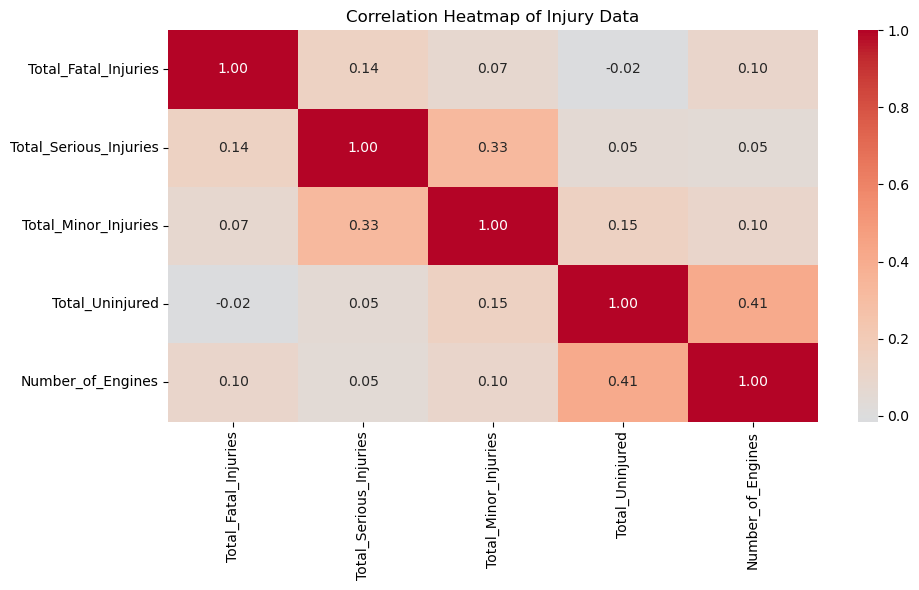

In [97]:
plt.figure(figsize=(10, 6))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f", center=0)
plt.title('Correlation Heatmap of Injury Data')
plt.tight_layout()
plt.show()

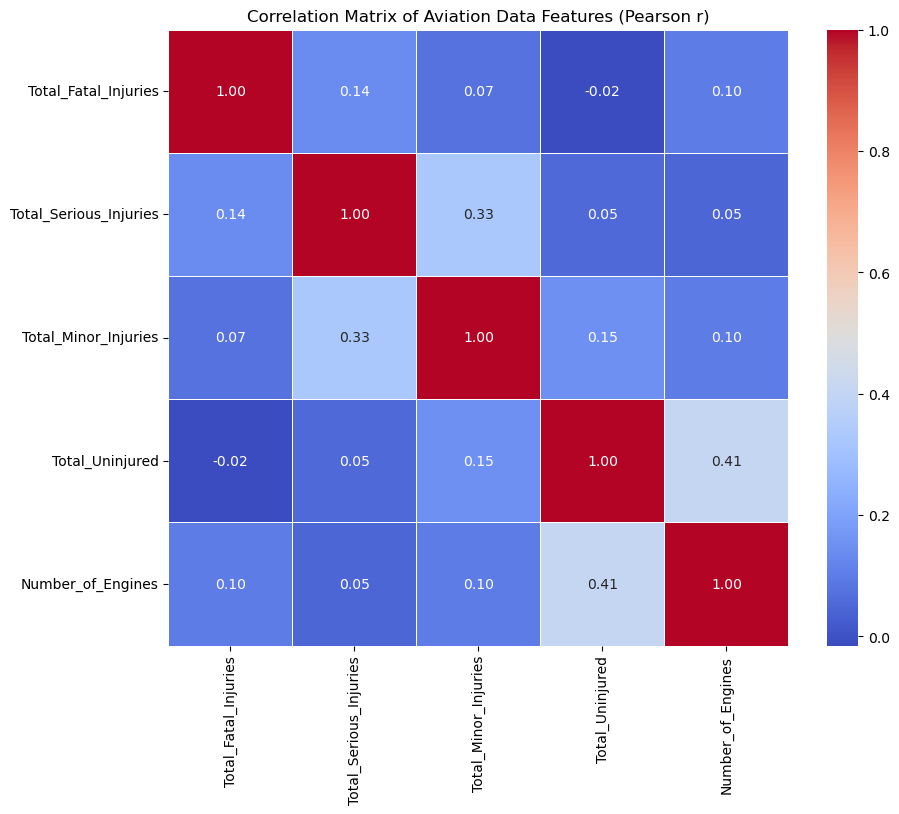

In [98]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr(method='pearson')

#correlation_matrix = df.corr(method='pearson') # 'pearson' is default
plt.figure(figsize=(10, 8)) # Set the size of the plot
sns.heatmap(correlation_matrix,
            annot=True,     # Show the correlation values on the heatmap
            cmap='coolwarm',# Color map (coolwarm is good for positive/negative correlations)
            fmt=".2f",      # Format the annotations to 2 decimal places
            linewidths=.5)  # Add lines between cells for better separation

plt.title('Correlation Matrix of Aviation Data Features (Pearson r)')
plt.show()

#### Statistical Summary

1. able to determine the mean , median , count , Quantiles , maximum and minimum values
2. potentially identify outliers 

In [99]:
# summary statistics 
df.describe()

,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Number_of_Engines
count,77488.000000,76379.000000,76956.000000,82977.000000,82805.000000
mean,0.647855,0.279881,0.357061,5.325440,1.146585
std,5.485960,1.544084,2.235625,27.913634,0.446510
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,349.000000,161.000000,380.000000,699.000000,8.000000


In [100]:
# cleaning the numerical columns

df['Total_Fatal_Injuries'] = df['Total_Fatal_Injuries'].fillna(df['Total_Fatal_Injuries'].median())
df['Total_Serious_Injuries'] = df['Total_Serious_Injuries'].fillna(df['Total_Serious_Injuries'].median())
df['Total_Minor_Injuries'] = df['Total_Minor_Injuries'].fillna(df['Total_Minor_Injuries'].median())
df['Total_Uninjured'] = df['Total_Uninjured'].fillna(df['Total_Uninjured'].median())


In [101]:
# confirm new percentage of df
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.070875
Model                      0.103500
Injury_Severity            1.124999
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.965991
Aircraft_Category         63.677170
Engine_Type                7.982990
Number_of_Engines          6.844491
Location                   0.058500
Broad_phase_of_flight     30.560587
Country                    0.254250
Weather_Condition          5.053494
dtype: float64

In [102]:
# checking the Make column
df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [103]:
# make them to lower case all 
df['Make'].str.lower().str.strip()

0                           stinson
1                             piper
2                            cessna
3                          rockwell
4                            cessna
                    ...            
88884                         piper
88885                      bellanca
88886    american champion aircraft
88887                        cessna
88888                         piper
Name: Make, Length: 88889, dtype: object

In [104]:
# checking unique values 
df['Make'].nunique()

8237

In [105]:
df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [106]:
# dropping the nan values in the column 'Make'
df.dropna(subset=['Make'],inplace=True)

In [107]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.055164
Injury_Severity            1.106658
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          6.794182
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
Weather_Condition          5.014298
dtype: float64

In [108]:
# Cleaning 'Injury_Severity'
df['Injury_Severity'].mode()
df['Injury_Severity'].fillna(df['Injury_Severity'].mode()[0])

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88884        Minor
88885    Non-Fatal
88886    Non-Fatal
88887    Non-Fatal
88888        Minor
Name: Injury_Severity, Length: 88826, dtype: object

In [109]:
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.055164
Injury_Severity            1.106658
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.923648
Aircraft_Category         63.664918
Engine_Type                7.931236
Number_of_Engines          6.794182
Location                   0.058541
Broad_phase_of_flight     30.523721
Country                    0.253304
Weather_Condition          5.014298
dtype: float64

In [110]:
# cleaning MODEL
df.dropna(subset=['Model'],inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            1.102763
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.913953
Aircraft_Category         63.678656
Engine_Type                7.913086
Number_of_Engines          6.784415
Location                   0.058574
Broad_phase_of_flight     30.519166
Country                    0.253444
Weather_Condition          5.000169
dtype: float64

In [111]:
# CLEANING COUNTRY
df.dropna(subset=['Country'],inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            1.105565
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.924745
Aircraft_Category         63.599919
Engine_Type                7.927545
Number_of_Engines          6.793748
Location                   0.057593
Broad_phase_of_flight     30.585419
Country                    0.000000
Weather_Condition          5.008357
dtype: float64

In [112]:
#CLEANING WEATHER CONDITION

In [113]:
df['Weather_Condition'].value_counts()

Weather_Condition
VMC    77050
IMC     5958
UNK      847
Unk      262
Name: count, dtype: int64

In [114]:
# standardise to upper case 
df['Weather_Condition'].str.upper().str.strip()

0        UNK
1        UNK
2        IMC
3        IMC
4        VMC
        ... 
88884    NaN
88885    NaN
88886    VMC
88887    NaN
88888    NaN
Name: Weather_Condition, Length: 88552, dtype: object

##### Weather conditions abbreviations
1. VMC stands for: Visual Meteorological Conditions
2. IMC stands for: Instrument Meteorological Conditions
3. UNK stands for: Unknown / Unreported / Undefined

In [115]:
# clean nan values with 'not reported'
df['Weather_Condition'].replace({np.nan: "Not_Reported"},inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            1.105565
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          6.924745
Aircraft_Category         63.599919
Engine_Type                7.927545
Number_of_Engines          6.793748
Location                   0.057593
Broad_phase_of_flight     30.585419
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [116]:
df['Weather_Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Not_Reported', 'Unk'], dtype=object)

In [117]:
# CLEANING PURPOSE OF FLIGHT

In [118]:
df['Purpose_of_flight'].value_counts()

Purpose_of_flight
Personal                     49358
Instructional                10588
Unknown                       6687
Aerial Application            4710
Business                      4003
Positioning                   1627
Other Work Use                1259
Ferry                          808
Aerial Observation             787
Public Aircraft                718
Executive/corporate            549
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [119]:
df['Purpose_of_flight'].isna().sum()

6132

In [120]:
len(df['Purpose_of_flight'])

88552

In [121]:
# drop the null values 
df.dropna(subset=['Purpose_of_flight'],inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.061878
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         66.277603
Engine_Type                4.525601
Number_of_Engines          3.783062
Location                   0.049745
Broad_phase_of_flight     26.748362
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [122]:
#CLEANING LOCATION
df.dropna(subset=['Location'],inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.061909
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         66.270530
Engine_Type                4.526639
Number_of_Engines          3.757025
Location                   0.000000
Broad_phase_of_flight     26.724044
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [123]:
# CLEANING BROAD PHASE OF FLIGHT

In [124]:
# BROAD PHASE OF FLIGHT IS CRUCIAL FOR ACCURATE ANALYSIS 

In [125]:
# check its uniqueness
df['Broad_phase_of_flight'].unique

<bound method Series.unique of 0          Cruise
1         Unknown
2          Cruise
3          Cruise
4        Approach
           ...   
88882         NaN
88884         NaN
88886         NaN
88887         NaN
88888         NaN
Name: Broad_phase_of_flight, Length: 82379, dtype: object>

In [126]:
# value counts
df['Broad_phase_of_flight'].value_counts()

Broad_phase_of_flight
Landing        15213
Takeoff        12247
Cruise         10008
Maneuvering     8072
Approach        6390
Climb           1957
Descent         1822
Taxi            1813
Go-around       1343
Standing         851
Unknown          532
Other            116
Name: count, dtype: int64

In [127]:
# fill NaN VALUES WITH 'Not reported'
df['Broad_phase_of_flight'].fillna(("Not_Reported"),inplace=True)
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.061909
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         66.270530
Engine_Type                4.526639
Number_of_Engines          3.757025
Location                   0.000000
Broad_phase_of_flight      0.000000
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [128]:
# CLEANING ENGINE TYPE 

In [129]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'LR', 'NONE', 'UNK'],
      dtype=object)

In [130]:
# for the missing values , replace with unspecified
df['Engine_Type'].fillna('Unspecified')
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.061909
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         66.270530
Engine_Type                4.526639
Number_of_Engines          3.757025
Location                   0.000000
Broad_phase_of_flight      0.000000
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [131]:
df['Engine_Type'].unique()

array(['Reciprocating', nan, 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'LR', 'NONE', 'UNK'],
      dtype=object)

In [132]:
# CLEANING NUMBER OF ENGINES

In [133]:
df['Number_of_Engines']

0        1.0
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
88882    NaN
88884    NaN
88886    1.0
88887    NaN
88888    NaN
Name: Number_of_Engines, Length: 82379, dtype: float64

In [134]:
df['Number_of_Engines'].describe()

count    79284.000000
mean         1.120819
std          0.414196
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number_of_Engines, dtype: float64

In [135]:
# fill using the median 
df['Number_of_Engines'] = df['Number_of_Engines'].fillna(df['Number_of_Engines'].median())
df.isnull().mean()*100

Event_Date                 0.000000
Make                       0.000000
Model                      0.000000
Injury_Severity            0.061909
Total_Fatal_Injuries       0.000000
Total_Serious_Injuries     0.000000
Total_Minor_Injuries       0.000000
Total_Uninjured            0.000000
Purpose_of_flight          0.000000
Aircraft_Category         66.270530
Engine_Type                4.526639
Number_of_Engines          0.000000
Location                   0.000000
Broad_phase_of_flight      0.000000
Country                    0.000000
Weather_Condition          0.000000
dtype: float64

In [136]:
#CLEANING AIRCRAFT CATEGORY

In [137]:
df['Aircraft_Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'WSFT', 'ULTR'], dtype=object)

In [138]:
df['Aircraft_Category'] = df['Aircraft_Category'].fillna('Untold')
df.isnull().mean()*100

Event_Date                0.000000
Make                      0.000000
Model                     0.000000
Injury_Severity           0.061909
Total_Fatal_Injuries      0.000000
Total_Serious_Injuries    0.000000
Total_Minor_Injuries      0.000000
Total_Uninjured           0.000000
Purpose_of_flight         0.000000
Aircraft_Category         0.000000
Engine_Type               4.526639
Number_of_Engines         0.000000
Location                  0.000000
Broad_phase_of_flight     0.000000
Country                   0.000000
Weather_Condition         0.000000
dtype: float64

In [139]:
df.dropna(subset=['Injury_Severity'],inplace=True)
df.isnull().mean()*100

Event_Date                0.000000
Make                      0.000000
Model                     0.000000
Injury_Severity           0.000000
Total_Fatal_Injuries      0.000000
Total_Serious_Injuries    0.000000
Total_Minor_Injuries      0.000000
Total_Uninjured           0.000000
Purpose_of_flight         0.000000
Aircraft_Category         0.000000
Engine_Type               4.495433
Number_of_Engines         0.000000
Location                  0.000000
Broad_phase_of_flight     0.000000
Country                   0.000000
Weather_Condition         0.000000
dtype: float64

## 3 . EXPLORATORY DATA ANALYSIS : DATA VISUALIZATIONS 

#### 1. Which Aircraft Categories Are most involved in Accidents 

In [157]:
df['Aircraft_Category'] = df['Aircraft_Category'].replace({'WSFT': 'Weight-Shift'})


In [158]:
df['Aircraft_Category'].value_counts().head()

Aircraft_Category
Untold        54583
Airplane      23801
Helicopter     2744
Glider          504
Balloon         231
Name: count, dtype: int64

In [159]:
df['Aircraft_Category'].value_counts().tail()

Aircraft_Category
Powered Parachute    90
Ultralight           25
Blimp                 4
Unknown               3
Powered-Lift          2
Name: count, dtype: int64

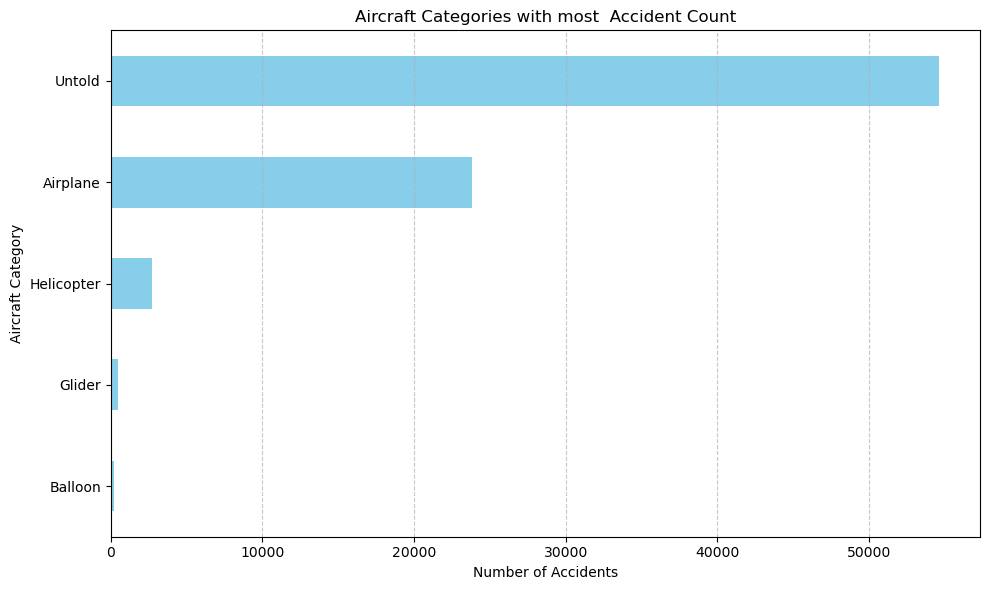

In [226]:
# LETS VISUALIZE
# Count the number of accidents per aircraft category
category_counts = df['Aircraft_Category'].value_counts().head()

# Plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Category")
plt.title("Aircraft Categories with most  Accident Count")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Aircraft categories with most accidents.png")
plt.show()

##### LESS ACCIDENT COUNTS PER AIRCRAFT CATEGOR

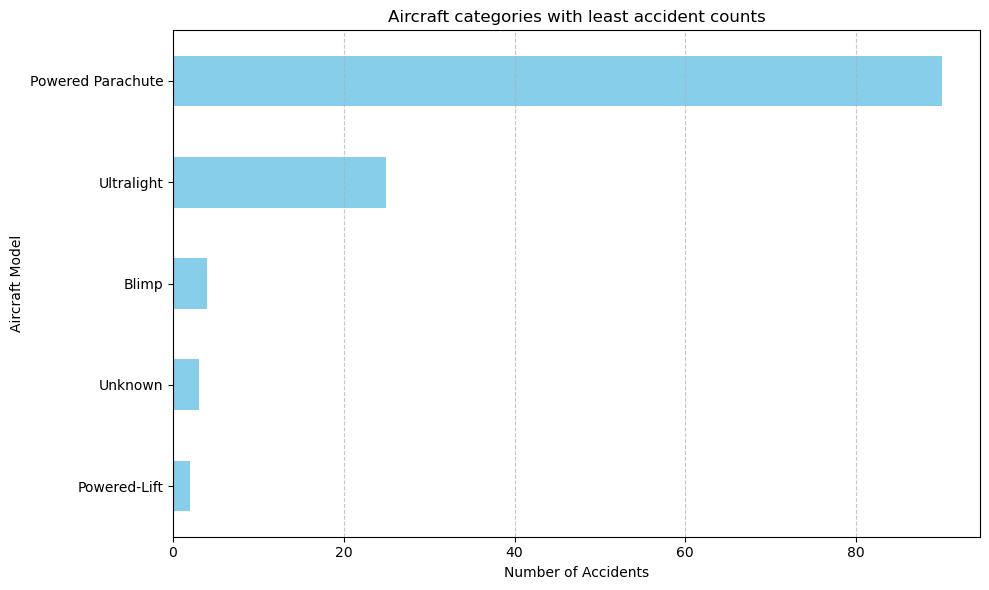

In [227]:
# Count the number of accidents per aircraft category
category_counts = df['Aircraft_Category'].value_counts().tail()

# Plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # Highest count at the top
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.title("Aircraft categories with least accident counts")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### AIRCRAFT CATEGORY THAT REPORTS MINIMAL CASUALTIES

In [228]:
# Group and calculate average fatal injuries
avg_fatalities = df.groupby('Aircraft_Category')['Total_Uninjured'].mean()
avg_fatalities.tail(5).sort_values(ascending=False)

Aircraft_Category
Untold          3.846747
Powered-Lift    1.500000
Ultralight      0.480000
Weight-Shift    0.284024
Unknown         0.000000
Name: Total_Uninjured, dtype: float64

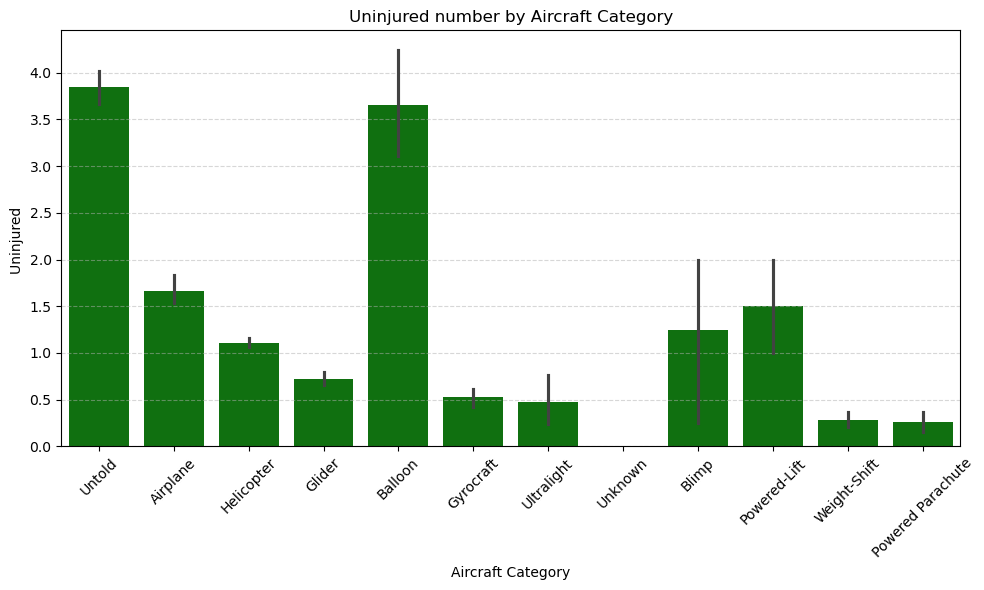

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Aircraft_Category', y='Total_Uninjured',color='green')
plt.title('Uninjured number by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Uninjured ')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("uninjured number by craft category.png")
plt.show()

##### Categories with fatal injuries 

In [230]:
# Group and calculate sum fatal injuries
sum_category_fatalities = df.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum()
sum_category_fatalities.head(5)

Aircraft_Category
Airplane     9149.0
Balloon        43.0
Blimp           0.0
Glider         94.0
Gyrocraft      43.0
Name: Total_Fatal_Injuries, dtype: float64

In [231]:
# both ULTR and ultralight mean the same 
df['Aircraft_Category'] = df['Aircraft_Category'].replace({'ULTR': 'Ultralight'})

In [232]:
# Group and calculate sum fatal injuries
sum_category_fatalities = df.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum()
sum_category_fatalities.head(5)

Aircraft_Category
Airplane     9149.0
Balloon        43.0
Blimp           0.0
Glider         94.0
Gyrocraft      43.0
Name: Total_Fatal_Injuries, dtype: float64

C:\Users\Zbook\AppData\Local\Temp\ipykernel_11320\3109673424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sum_category_fatalities.values, y=sum_category_fatalities.index,palette='viridis')


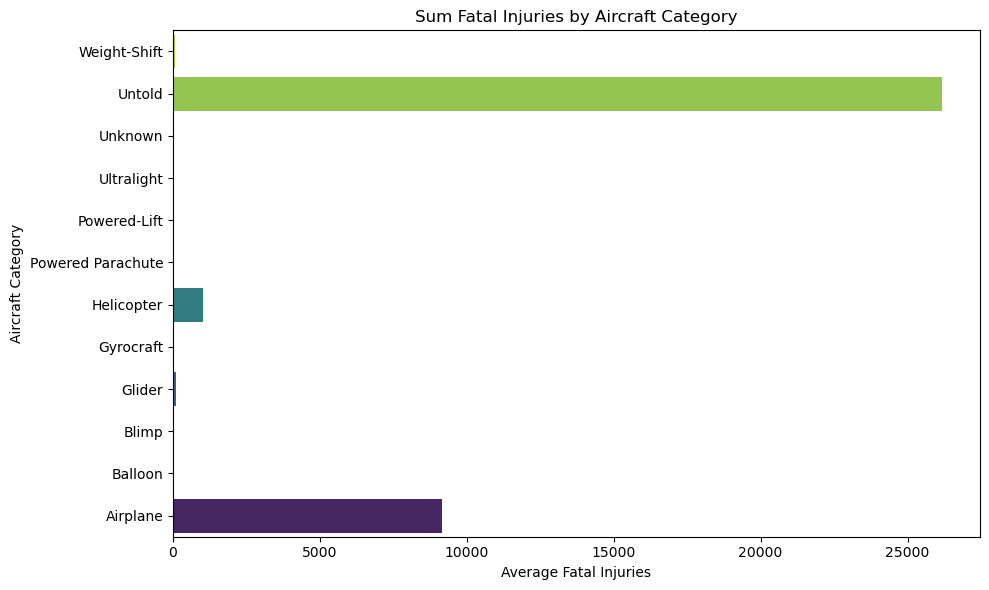

In [222]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sum_category_fatalities.values, y=sum_category_fatalities.index,palette='viridis')
plt.title('Sum Fatal Injuries by Aircraft Category')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Category')
plt.gca().invert_yaxis()  # Aircraft category with highest fatality tops
plt.tight_layout()
plt.savefig("fatal injuries by aircraft categories.png")
plt.show()

### 2. Which Engine type is prone to accidents , fatality reports per engine 

In [233]:
df['Engine_Type'].value_counts().head(5)

Engine_Type
Reciprocating    68560
Turbo Shaft       3130
Turbo Prop        2930
Unknown           1986
Turbo Fan         1441
Name: count, dtype: int64

In [172]:
df['Engine_Type'].value_counts().tail(5)

Engine_Type
Turbo Jet    568
Electric       7
LR             2
NONE           2
UNK            1
Name: count, dtype: int64

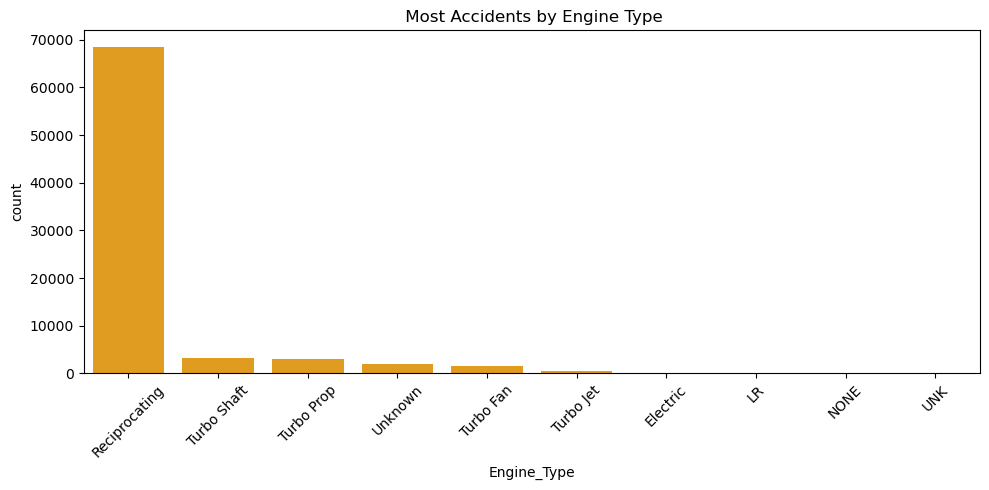

In [221]:
engine_type_count = df['Engine_Type'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Engine_Type',color='orange',order=df['Engine_Type'].value_counts().index)
plt.title(' Most Accidents by Engine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("most accidents by engine type.png")
plt.show()

##### How do the engine types vary in terms of fatality cases reported

In [174]:
# Total fatalities by engine type
fatalities_by_engine = df.groupby('Engine_Type')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)
fatalities_by_engine

Engine_Type
Reciprocating    22910.0
Unknown           3568.0
Turbo Fan         3115.0
Turbo Prop        2068.0
Turbo Shaft       1305.0
Turbo Jet          763.0
Electric             2.0
LR                   0.0
NONE                 0.0
UNK                  0.0
Name: Total_Fatal_Injuries, dtype: float64

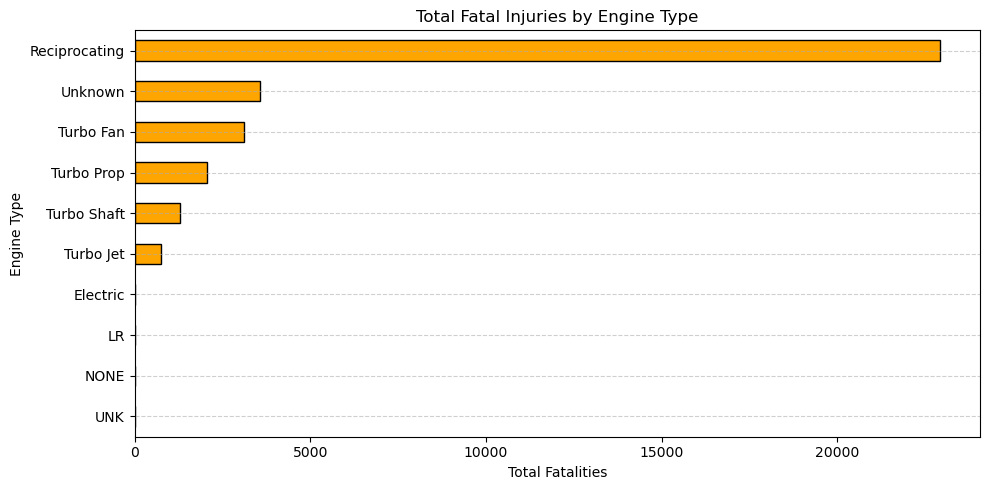

In [220]:
#Total fatalities
plt.figure(figsize=(10, 5))
fatalities_by_engine.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Total Fatal Injuries by Engine Type')
plt.ylabel('Engine Type')
plt.xlabel('Total Fatalities')
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Highest count at the to
plt.tight_layout()
plt.savefig("fatalities by engine type.png")
plt.show()

### 3. WHAT PHASE OF FLIGHTS DO MOST ACCIDENTS OCCUR

In [180]:
df['Broad_phase_of_flight'].value_counts().head()

Broad_phase_of_flight
Not_Reported    21964
Landing         15213
Takeoff         12247
Cruise          10008
Maneuvering      8072
Name: count, dtype: int64

C:\Users\Zbook\AppData\Local\Temp\ipykernel_11320\1385488949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Broad_phase_of_flight', order=df['Broad_phase_of_flight'].value_counts().index, palette='mako')


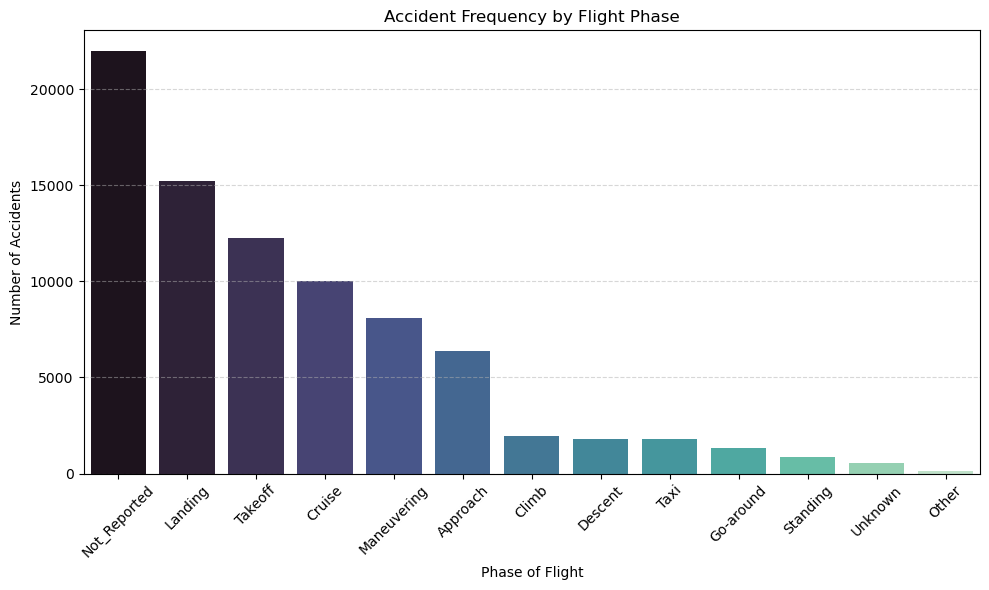

In [219]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Broad_phase_of_flight', order=df['Broad_phase_of_flight'].value_counts().index, palette='mako')
plt.xticks(rotation=45)
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.title('Accident Frequency by Flight Phase')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("accident freq by phase.png")
plt.show()


OF THE CLEAR RECORDS , MOST ACCIDENTS DURING THE LANDING PHASE .


### 5. WHICH WEATHER CONDITION HAS THE MOST FATALITIES

In [182]:
weather_fatalities= df.groupby('Weather_Condition')['Total_Fatal_Injuries'].sum()
weather_fatalities

Weather_Condition
IMC              9565.0
Not_Reported     1242.0
UNK              2258.0
Unk               184.0
VMC             23361.0
Name: Total_Fatal_Injuries, dtype: float64

In [183]:
df['Weather_Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Not_Reported', 'Unk'], dtype=object)

In [185]:
# UNK IS SAME AS Unk meaning Unknown 
df['Weather_Condition'] = df['Weather_Condition'].replace({'Unk': 'UNK'})


In [187]:
weather_fatalities= df.groupby('Weather_Condition')['Total_Fatal_Injuries'].sum()
weather_fatalities.sort_values(ascending=False)

Weather_Condition
VMC             23361.0
IMC              9565.0
UNK              2442.0
Not_Reported     1242.0
Name: Total_Fatal_Injuries, dtype: float64

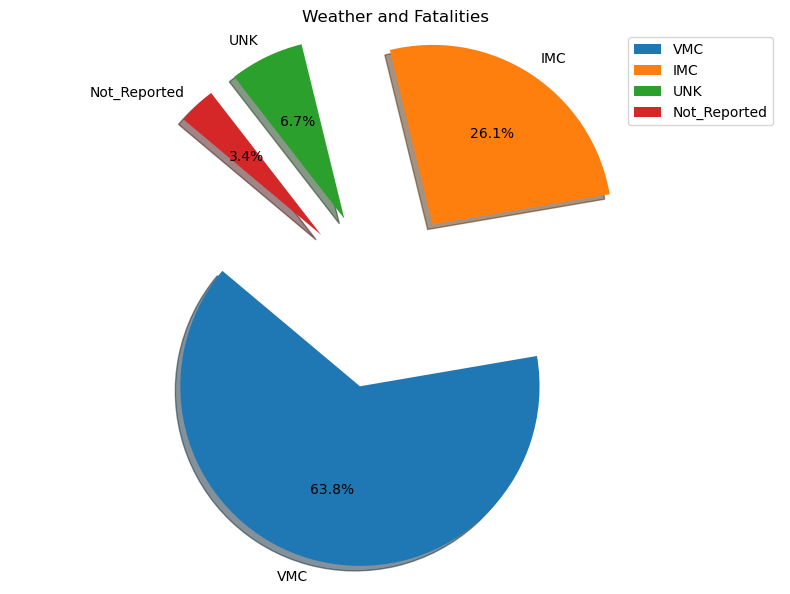

In [216]:
# Group and sum fatal injuries by purpose
weather_fatalities = df.groupby('Weather_Condition')['Total_Fatal_Injuries'].sum().sort_values(ascending=False).head(4)

# Pie chart
plt.figure(figsize=(8, 6))
explode = [0.5, 0.5, 0.5, 0.5]  # Highlight fatal injuries
plt.pie(weather_fatalities, labels=weather_fatalities.index, autopct='%1.1f%%', startangle=140 ,explode=explode,shadow=True)
mylabels=(weather_fatalities)
plt.title('Weather and Fatalities')
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.savefig('weather and fatalities pie.png')
plt.show()

### 6 . WHAT IS THE TREND OF AVIATION SAFETY

In [205]:
# CONVERTING EVENT DATE TO datetime datatype
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')
df['Year'] = df['Event_Date'].dt.year

In [206]:
# Accidents per year
df['Year'].value_counts().sort_index()

Year
1948       1
1962       1
1974       1
1977       1
1979       1
1981       1
1982    3559
1983    3530
1984    3436
1985    3076
1986    2867
1987    2804
1988    2711
1989    2525
1990    2498
1991    2441
1992    2336
1993    2304
1994    2239
1995    2292
1996    2172
1997    2125
1998    2198
1999    2181
2000    2156
2001    1797
2002    1800
2003    1850
2004    1757
2005    1795
2006    1640
2007    1793
2008    1668
2009    1567
2010    1528
2011    1590
2012    1598
2013    1311
2014    1297
2015    1301
2016    1311
2017    1279
2018    1316
2019    1252
2020    1098
2021    1126
2022    1198
Name: count, dtype: int64

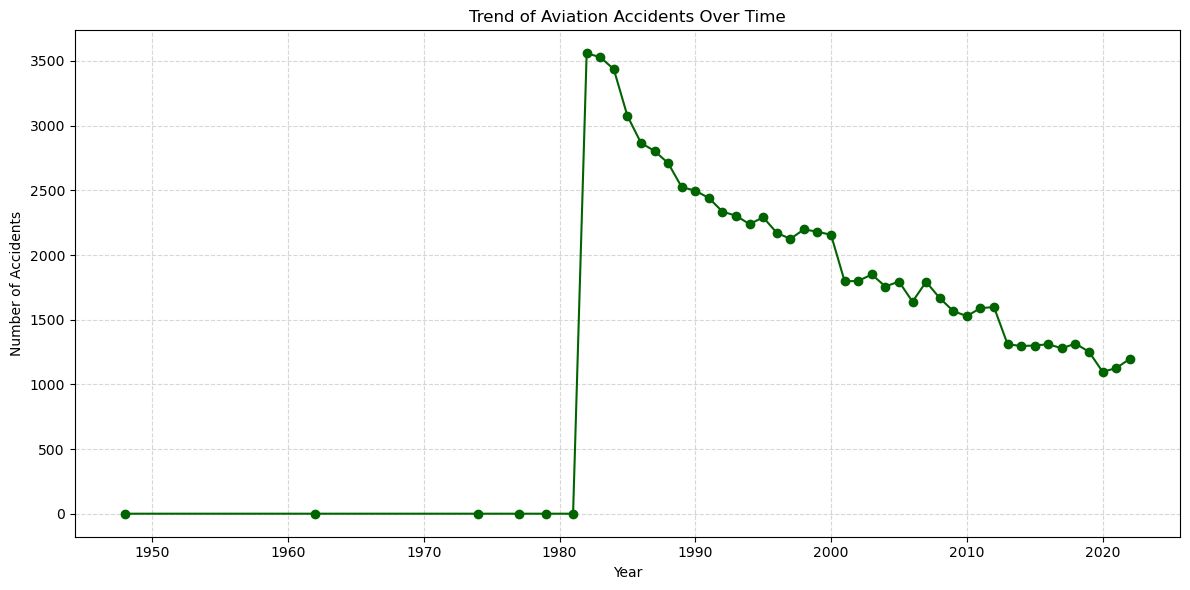

In [217]:
# accident per year 
accidents_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
accidents_per_year.plot(kind='line', marker='o', color='darkgreen')
plt.title('Trend of Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('trend of aviation.png')
plt.show()

#### Fatalities per year

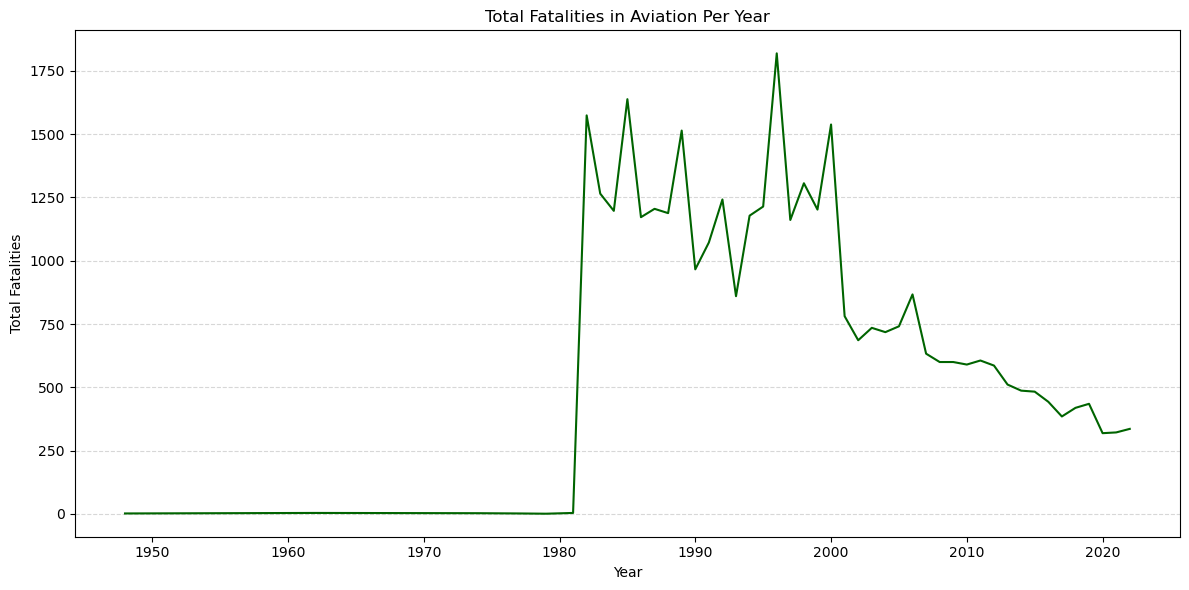

In [218]:
fatalities_per_year = df.groupby('Year')['Total_Fatal_Injuries'].sum()

plt.figure(figsize=(12,6))
fatalities_per_year.plot(kind='line', color='darkgreen')
plt.title('Total Fatalities in Aviation Per Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('fatalies per year.png')
plt.show()


In [234]:
df['Weather_Condition'].value_counts()

Weather_Condition
VMC             74772
IMC              5510
Not_Reported     1111
UNK               935
Name: count, dtype: int64

## OBSERVATIONS 

1. AIRPLANE  category has the highest number of Aviation A CCIDENT COUNT , followed by HELICOPTER
2. POWER-SHIFT  category records the LOWEST accident counts

3. Weight-Shift category records minimal fatal cases while AIRPLANE crashes are the MOST FATAL

4. Aircrafts with the RECIPROCATING engine type recorded high aviation accident frequencies
5. Aircrafts with a single engine are also prone to accidents

6. Most Aviation accidents occur at the Landing phase . Could be attributed to frequency due to proximity to the ground and pilot errors

8. VMC weather condition high fatality rates , it also records high accident occurance frequency

9. Aviation Accidents are declining with time over the years 

## RECOMMENDATIONS

1. Invest in Aircfrats with more than one engine , preferebly the double engined aircrafts . they are less prone to accidents and experience low fatalities when accident occurs
2. Purchase power-shift category as it guarantees safety
3. Avoid reciprocating engine types as they are prone to accidents
4. Employ well trained personell to minimize humar errors that can be fatal
5. Employ updated weather forecasting technologies for accurate weather analysis
6. It is safe to invest in commercial aircrafts as they generate more income to the business 

### Conclusion

This analysis has revealed meaningful trends in aviation safety, highlighting how accident frequency and severity vary by aircraft category, flight phase, weather condition, and over time. Notably:

Landing and approach phases emerge as the most accident-prone stages, underscoring the critical nature of precision and preparedness during descent.

Weather continues to play a major role, with incidents under Visual Meteorological Conditions (VMC) still accounting for a substantial share—pointing toward human factors rather than weather alone.

Categories like Ultralight and Weight-Shift aircraft report both low uninjured rates and low accident counts, suggesting either limited usage or higher vulnerability.

Despite some data limitations—like substantial missing values in Aircraft_Category, Latitude, and Longitude—imputation and flagging strategies preserved much of the dataset's integrity.

Over time, there appears to be a decline in total accidents and fatalities, suggesting progress in safety protocols, aircraft technology, and pilot training.

Together, these findings emphasize the importance of continued investment in approach/landing safety measures, better incident reporting practices, and deeper investigation into general aviation and light aircraft performance.

##### saving cleaned data

In [235]:
df = pd.DataFrame(df)

In [236]:
df.to_csv('Aviation_Risk_Data.csv', index=False)
